数据清洗是对一些没有用的数据进行处理的过程。

很多数据集存在数据缺失、数据格式错误、错误数据或重复数据的情况，如果要对使数据分析更加准确，就需要对这些没有用的数据进行处理。

在这个教程中，我们将利用 Pandas包来进行数据清洗。

本文使用到的测试数据 property-data.csv 如下：
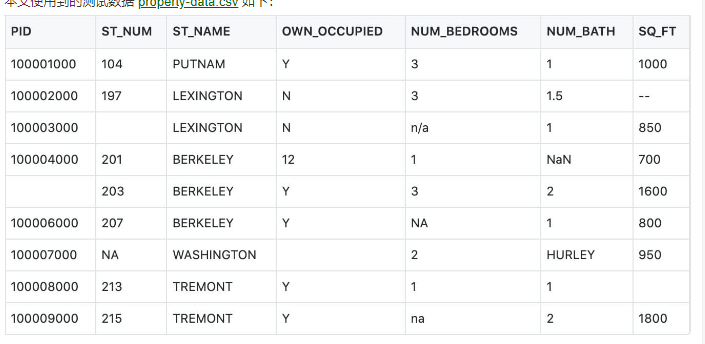
上表包含了四种空数据：

n/a
NA
—
na

## Pandas 清洗空值

如果我们要删除包含空字段的行，可以使用 dropna() 方法，语法格式如下：

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
参数说明：

axis：默认为 0，表示逢空值剔除整行，如果设置参数 axis＝1 表示逢空值去掉整列。
how：默认为 'any' 如果一行（或一列）里任何一个数据有出现 NA 就去掉整行，如果设置 how='all' 一行（或列）都是 NA 才去掉这整行。
thresh：设置需要多少非空值的数据才可以保留下来的。
subset：设置想要检查的列。如果是多个列，可以使用列名的 list 作为参数。
inplace：如果设置 True，将计算得到的值直接覆盖之前的值并返回 None，修改的是源数据。
我们可以通过 isnull() 判断各个单元格是否为空。

In [1]:
import pandas as pd

df=pd.read_csv("property-data.csv")

print(df["NUM_BEDROOMS"])
print(df["NUM_BEDROOMS"].isnull())

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


以上例子中我们看到 Pandas 把 n/a ,空字符串和NAN 当作空数据，na 不是空数据，不符合我们要求，我们可以指定空数据类型：

na 通常是 “not available” 的缩写，表示数据不可用。在 pandas 中，NaN（Not a Number）和 None 都被视为空数据。虽然 na 和 None 都表示数据缺失，但它们并不完全相同。

In [2]:
import pandas as pd

missing_values=["n/a","na","--"]
df=pd.read_csv("property-data.csv",na_values=missing_values)

print(df["NUM_BEDROOMS"])
print(df["NUM_BEDROOMS"].isnull())

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    1.0
8    NaN
Name: NUM_BEDROOMS, dtype: float64
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool


接下来的实例演示了删除包含空数据的行。

In [4]:
import pandas as pd

df=pd.read_csv("property-data.csv")

"""
这段代码并没有指定哪些符号被视为空数据。默认情况下，pandas 会将空字符串、NaN 和 None 视为空数据。
"""
new_df=df.dropna()

print(new_df.to_string())

           PID  ST_NUM    ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0     PUTNAM            Y            3        1  1000
1  100002000.0   197.0  LEXINGTON            N            3      1.5    --
8  100009000.0   215.0    TREMONT            Y           na        2  1800


注意：默认情况下，dropna() 方法返回一个新的 DataFrame，不会修改源数据。

如果你要修改源数据 DataFrame, 可以使用 inplace = True 参数:

In [6]:
import pandas as pd
df=pd.read_csv("property-data.csv")

df.dropna(inplace=True)

print(df.to_string())

           PID  ST_NUM    ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0     PUTNAM            Y            3        1  1000
1  100002000.0   197.0  LEXINGTON            N            3      1.5    --
8  100009000.0   215.0    TREMONT            Y           na        2  1800


我们也可以移除指定列有空值的行：

In [9]:
import pandas as pd

df=pd.read_csv("property-data.csv")

df.dropna(subset=["ST_NUM"],inplace=True)

print(df.to_string())

           PID  ST_NUM    ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0     PUTNAM            Y            3        1  1000
1  100002000.0   197.0  LEXINGTON            N            3      1.5    --
3  100004000.0   201.0   BERKELEY           12            1      NaN   700
4          NaN   203.0   BERKELEY            Y            3        2  1600
5  100006000.0   207.0   BERKELEY            Y          NaN        1   800
7  100008000.0   213.0    TREMONT            Y            1        1   NaN
8  100009000.0   215.0    TREMONT            Y           na        2  1800


我们也可以 fillna() 方法来替换一些空字段：

In [11]:
import pandas as pd

df=pd.read_csv("property-data.csv")

df.fillna(12345,inplace=True)

print(df.to_string())

           PID   ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH  SQ_FT
0  100001000.0    104.0      PUTNAM            Y            3        1   1000
1  100002000.0    197.0   LEXINGTON            N            3      1.5     --
2  100003000.0  12345.0   LEXINGTON            N        12345        1    850
3  100004000.0    201.0    BERKELEY           12            1    12345    700
4      12345.0    203.0    BERKELEY            Y            3        2   1600
5  100006000.0    207.0    BERKELEY            Y        12345        1    800
6  100007000.0  12345.0  WASHINGTON        12345            2   HURLEY    950
7  100008000.0    213.0     TREMONT            Y            1        1  12345
8  100009000.0    215.0     TREMONT            Y           na        2   1800


我们也可以指定某一个列来替换数据：

In [13]:
import pandas as pd
df=pd.read_csv("property-data.csv")

df["PID"].fillna(12345,inplace=True)
print(df.to_string())

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4      12345.0   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


替换空单元格的常用方法是计算列的均值、中位数值或众数。

Pandas使用 mean()、median() 和 mode() 方法计算列的均值（所有值加起来的平均值）、中位数值（排序后排在中间的数）和众数（出现频率最高的数）。

In [15]:
# 使用 mean() 方法计算列的均值并替换空单元格：
import pandas as pd

df=pd.read_csv("property-data.csv")

x=df["ST_NUM"].mean()

df["ST_NUM"].fillna(x,inplace=True)

print(df.to_string())

           PID      ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0  104.000000      PUTNAM            Y            3        1  1000
1  100002000.0  197.000000   LEXINGTON            N            3      1.5    --
2  100003000.0  191.428571   LEXINGTON            N          NaN        1   850
3  100004000.0  201.000000    BERKELEY           12            1      NaN   700
4          NaN  203.000000    BERKELEY            Y            3        2  1600
5  100006000.0  207.000000    BERKELEY            Y          NaN        1   800
6  100007000.0  191.428571  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0  213.000000     TREMONT            Y            1        1   NaN
8  100009000.0  215.000000     TREMONT            Y           na        2  1800


In [16]:
# 使用 median() 方法计算列的中位数并替换空单元格：
import pandas as pd
df=pd.read_csv("property-data.csv")

x=df["ST_NUM"].median()

df["ST_NUM"].fillna(x,inplace=True)
print(df.to_string())

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0   203.0   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0   203.0  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


In [17]:
# 使用 mode() 方法计算列的众数并替换空单元格：
import pandas as pd
df=pd.read_csv("property-data.csv")

x=df["ST_NUM"].mode()

df["ST_NUM"].fillna(x,inplace=True)
print(df.to_string())

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0   201.0   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0   215.0  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


##  Pandas 清洗格式错误数据

数据格式错误的单元格会使数据分析变得困难，甚至不可能。

我们可以通过包含空单元格的行，或者将列中的所有单元格转换为相同格式的数据。

以下实例会格式化日期：

In [24]:
import pandas as pd
# 第三个日期格式错误
data = {
  "Date": ['2020/12/01', '2020/12/02' , '20201226'],
  "duration": [50, 40, 45]
}

df=pd.DataFrame(data,index=["day1","day2","day3"])

df["Date"]=pd.to_datetime(df["Date"])


print(df.to_string())

           Date  duration
day1 2020-12-01        50
day2 2020-12-02        40
day3 2020-12-26        45


##  Pandas 清洗错误数据

数据错误也是很常见的情况，我们可以对错误的数据进行替换或移除。

以下实例会替换错误年龄的数据：

In [25]:
import pandas as pd

person = {
  "name": ['Google', 'Runoob' , 'Taobao'],
  "age": [50, 40, 12345]    # 12345 年龄数据是错误的
}

df=pd.DataFrame(person)

df.loc[2,"age"]=30 # 修改数据

print(df.to_string())

     name  age
0  Google   50
1  Runoob   40
2  Taobao   30


In [27]:
# 将 age 大于 120 的设置为 120:
import pandas as pd

person = {
  "name": ['Google', 'Runoob' , 'Taobao'],
  "age": [50, 200, 12345]    
}

df = pd.DataFrame(person)

for x in df.index:
    if df.loc[x,"age"]>120:
        df.loc[x,"age"]=120

print(df.to_string())

     name  age
0  Google   50
1  Runoob  120
2  Taobao  120


In [29]:
# 将 age 大于 120 的删除:
import pandas as pd

person = {
  "name": ['Google', 'Runoob' , 'Taobao'],
  "age": [50, 40, 12345]    # 12345 年龄数据是错误的
}

df = pd.DataFrame(person)

for x in df.index:
    if df.loc[x,"age"]>120:
        df.drop(x,inplace=True)

print(df.to_string())

     name  age
0  Google   50
1  Runoob   40


## Pandas 清洗重复数据

如果我们要清洗重复数据，可以使用 duplicated() 和 drop_duplicates() 方法。

如果对应的数据是重复的，duplicated() 会返回 True，否则返回 False。

In [30]:
import pandas as pd

person = {
  "name": ['Google', 'Runoob', 'Runoob', 'Taobao'],
  "age": [50, 40, 40, 23]  
}
df=pd.DataFrame(person)

print(df.duplicated())

0    False
1    False
2     True
3    False
dtype: bool


删除重复数据，可以直接使用drop_duplicates() 方法。

In [31]:
import pandas as pd

persons = {
  "name": ['Google', 'Runoob', 'Runoob', 'Taobao'],
  "age": [50, 40, 40, 23]  
}

df = pd.DataFrame(persons)

df.drop_duplicates(inplace=True)

print(df)

     name  age
0  Google   50
1  Runoob   40
3  Taobao   23
